<b>
<p>
<center>
<font size="5">
Telco Customer Churn Prediction
</font>
</center>
</p>

<p>
<center>
<font size="4">
Tree Based Model
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Final Project
</font>
</center>
</p>

<p>
<center>
<font size="3">
George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Jiaming Zhou, Qihang Li
</font>
</center>
</p>
</b>

# Overview

- Customer churn, also known as customer attrition, occurs when customers stop doing business with a company or stop using a company’s services. By being aware of and monitoring churn rate, companies are equipped to determine their customer retention success rates and identify strategies for improvement. 
- **Goal**: We will use a Tree-Based-Models to understand the precise customer behaviors and attributes which signal the risk and timing of customer churn.
- **Data Content**

    - Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
          1.Customers who left within the last month – the column is called Churn
          2.Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
          3.Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
          4.Demographic info about customers – gender, age range, and if they have partners and dependents          


#Reference:

- Some code: https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/fall_2020/code/p2_shallow_learning/p2_c2_supervised_learning/p2_c2_s5_tree_based_models/case_study/case_study.ipynb
- Competition on Kaggle: https://www.kaggle.com/blastchar/telco-customer-churn

## Google drive

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/fall_2020/finalproject/'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/fall_2020/code/utilities/p2_shallow_learning/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/fall_2020/code/models/p2_shallow_learning/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [ ]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/fall_2020/code/utilities/p2_shallow_learning


## loading the data

In [ ]:
import pandas as pd

# Load the raw training data
df = pd.read_csv(abspath_curr + 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
                           header=0)
# Make a copy of df_raw_train
df_train = df.copy(deep=True)

# Get the name of the target
target = 'Churn'

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')


In [ ]:
from sklearn.model_selection import train_test_split
(df_raw_train, df_raw_test) = train_test_split(df, test_size=0.2,shuffle=True)
df_train = df_raw_train.copy(deep=True)
df_test = df_raw_test.copy(deep=True)

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,5634,21


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1409,21


In [ ]:
# Print the first 5 rows of df_train
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2142,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,No
1623,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
6074,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
1362,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No


In [ ]:
# Print the first 5 rows of df_test
df_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10,No


## Splitting the data
divide the training data into training (80%) and validation (20%).

In [ ]:

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)

# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,4507,21


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1127,21


##Handling uncommon features
###Identifying uncommon features
 find common variables between the training, validation and test data.

In [ ]:
# Call common_var_checker
# See the implementation in pmlm_utilities.ipynb
df_common_var = common_var_checker(df_train, df_val, df_test, target)

# Print df_common_var
df_common_var

,common var
0,Churn
1,Contract
2,Dependents
3,DeviceProtection
4,InternetService
5,MonthlyCharges
6,MultipleLines
7,OnlineBackup
8,OnlineSecurity
9,PaperlessBilling


In [ ]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature



###Removing uncommon features

In [ ]:
# Remove the uncommon features from the training data
df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)

# Print the first 5 rows of df_train
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6729-FZWSY,Male,0,No,No,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.45,1195.95,No
1,4806-DXQCE,Female,1,Yes,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,113.65,7714.65,No
2,8690-ZVLCL,Female,0,Yes,Yes,68,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),88.00,6161.90,No
3,1530-ZTDOZ,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75,No
4,4006-HKYHO,Male,0,No,No,63,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),86.70,5309.50,No


In [ ]:
# Remove the uncommon features from the validation data
df_val = df_val.drop(columns=uncommon_feature_val_not_train_test)

# Print the first 5 rows of df_val
df_val.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9501-UKKNL,Male,0,No,No,59,No,No phone service,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,51.70,3005.80,No
1,0060-FUALY,Female,0,Yes,No,59,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,94.75,5597.65,No
2,2951-QOQTK,Male,0,No,Yes,4,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,No,Credit card (automatic),80.80,332.45,Yes
3,0337-CNPZE,Female,0,No,No,41,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.30,4443.45,Yes
4,5862-BRIXZ,Male,0,No,No,46,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),60.75,2893.40,No


In [ ]:
# Remove the uncommon features from the test data
df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

# Print the first 5 rows of df_test
df_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10,No


##Handling identifiers

###Combining the training, validation and test data
The code below shows how to combine the training, validation and test data.

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [ ]:
#Identifying identifiers
#The code below shows how to find identifiers from data.

# Call id_checker on df
# See the implementation in pmlm_utilities.ipynb
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

,customerID
0,6729-FZWSY
1,4806-DXQCE
2,8690-ZVLCL
3,1530-ZTDOZ
4,4006-HKYHO


In [ ]:
##Removing identifiers
#The code below shows how to remove identifiers from data.

import numpy as np

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)

# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)

# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [ ]:
# Print the first 5 rows of df_train
df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.45,1195.95,No
1,Female,1,Yes,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,113.65,7714.65,No
2,Female,0,Yes,Yes,68,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),88.00,6161.90,No
3,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75,No
4,Male,0,No,No,63,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),86.70,5309.50,No


In [ ]:
# Print the first 5 rows of df_val
df_val.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,59,No,No phone service,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,51.70,3005.80,No
1,Female,0,Yes,No,59,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,94.75,5597.65,No
2,Male,0,No,Yes,4,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,No,Credit card (automatic),80.80,332.45,Yes
3,Female,0,No,No,41,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.30,4443.45,Yes
4,Male,0,No,No,46,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),60.75,2893.40,No


In [ ]:
# Print the first 5 rows of df_test
df_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80,Yes
2715,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70,No
1807,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10,No


*Handling date time variables*

There is no date time variable

##Handling missing data


In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [ ]:
# Call nan_checker on df
# See the implementation in pmlm_utilities.ipynb
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype
0,TotalCharges,0.001562,float64


In [ ]:
# Print the unique data type of variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,float64


In [ ]:
# Get the variables with missing values, their proportion of missing values and data type
df_miss = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype
0,TotalCharges,0.001562,float64


In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,4507,20


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1127,20


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1409,20


In [ ]:
from sklearn.impute import SimpleImputer

# If there are missing values
if len(df_miss['var']) > 0:
    # The SimpleImputer
    si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

    # Impute the variables with missing values in df_train, df_val and df_test 
    df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
    df_val[df_miss['var']] = si.transform(df_val[df_miss['var']])
    df_test[df_miss['var']] = si.transform(df_test[df_miss['var']])

In [ ]:
df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.45,1195.95,No
1,Female,1,Yes,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,113.65,7714.65,No
2,Female,0,Yes,Yes,68,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),88.00,6161.90,No
3,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75,No
4,Male,0,No,No,63,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),86.70,5309.50,No


##Encoding the data


In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,object
1,int64
2,float64


In [ ]:
##Identifying categorical variables
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)
df_cat = df_cat.drop(15,0)
# Print the dataframe
df_cat

,var,nunique
0,PaymentMethod,4
1,MultipleLines,3
2,InternetService,3
3,OnlineSecurity,3
4,OnlineBackup,3
5,DeviceProtection,3
6,TechSupport,3
7,StreamingTV,3
8,StreamingMovies,3
9,Contract,3


In [ ]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(np.intersect1d(df.columns, df_cat['var']), [target]))

# Print the first 5 rows of df
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_No,Dependents_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaperlessBilling_No,PaperlessBilling_Yes,Partner_No,Partner_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_No,PhoneService_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,gender_Female,gender_Male
0,0,67,19.45,1195.95,No,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
1,1,70,113.65,7714.65,No,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0
2,0,68,88.00,6161.90,No,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0
3,0,49,40.65,2070.75,No,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0
4,0,63,86.70,5309.50,No,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1


In [ ]:
df[target]

0        No
1        No
2        No
3        No
4        No
       ... 
6366     No
315      No
2439     No
5002     No
1161    Yes
Name: Churn, Length: 7043, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder
le = LabelEncoder()

# Encode categorical target in the combined data
df[target] = le.fit_transform(df[target].astype(str))

# Print the first 5 rows of df
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_No,Dependents_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaperlessBilling_No,PaperlessBilling_Yes,Partner_No,Partner_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_No,PhoneService_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,gender_Female,gender_Male
0,0,67,19.45,1195.95,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
1,1,70,113.65,7714.65,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0
2,0,68,88.00,6161.90,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0
3,0,49,40.65,2070.75,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0
4,0,63,86.70,5309.50,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1


In [ ]:
##Separating the training, validation and test data
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])


,# rows,# columns
0,4507,46


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])


,# rows,# columns
0,1127,46


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])


,# rows,# columns
0,1409,46


##Splitting the feature and target


In [ ]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

##Scaling the data


In [ ]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

In [ ]:
# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.transform(X_val)

# Standardize the test data
X_test = ss.transform(X_test)

# Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

models = {'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'mlpc': MLPClassifier(early_stopping=True, random_state=random_seed),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=random_seed),
          'hgbc': HistGradientBoostingClassifier(random_state=random_seed)}

##Creating the dictionary of the pipelines


In [ ]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])


##Getting the predefined split cross-validator


In [ ]:
# Get the:
# feature matrix and target velctor in the combined training and validation data
# target vector in the combined training and validation data
# PredefinedSplit
# See the implementation in pmlm_utilities.ipynb
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)


##GridSearchCV


In [ ]:
param_grids = {}

####The parameter grid for LogisticRegression


In [ ]:
# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3]

# The parameter grid of C
C_grid = [0.1, 1, 10]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

####The parameter grid for MLPClassifier


In [ ]:

# The grids for alpha
alpha_grids = [10 ** i for i in range(-5, -2)]

# The grids for learning_rate_init
learning_rate_init_grids = [10 ** i for i in range(-4, -1)]

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

####The parameter grid for random forest


In [ ]:
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

####The parameter grid for histogram-based gradient boosting


In [ ]:
# The grids for learning_rate
learning_rate_grids = [10 ** i for i in range(-3, 2)]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

###Creating the directory for the cv results produced by GridSearchCV


In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

###Tuning the hyperparameters


In [ ]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + '/result/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.735139,"{'model__min_samples_leaf': 1, 'model__min_sam...","((DecisionTreeClassifier(ccp_alpha=0.0, class_..."
1,0.722737,"{'model__learning_rate': 0.1, 'model__min_samp...",(HistGradientBoostingClassifier(l2_regularizat...
2,0.719943,"{'model__alpha': 1e-05, 'model__learning_rate_...","(MLPClassifier(activation='relu', alpha=1e-05,..."
3,0.718381,"{'model__C': 0.1, 'model__tol': 1e-05}","(LogisticRegression(C=0.1, class_weight='balan..."


# Model Selection

In [ ]:
# Get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

# Generating the Submission File
Use the best model selected earlier to generate the submission file for this kaggle competition.

## Creating the directory for the submission file

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Generating the submission file

In [ ]:
# Get the best_score, best_param and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(X_test)

# Transform y_test_pred back to the original class
y_test_pred = le.inverse_transform(y_test_pred)

# Get the submission dataframe
df_submit = pd.DataFrame(np.hstack((df_raw_test['customerID'].to_numpy().reshape(-1, 1), y_test_pred.reshape(-1, 1))),
                         columns=['customerID', target])                                                                                      

# Generate the submission file
df_submit.to_csv(abspath_curr + '/result/submission/submission.csv', index=False)                                                                                                                                                                  

# Interpretation

## Creating the directory for the figures

In [ ]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Getting the feature importance detected by random forest

In [ ]:
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((np.setdiff1d(df.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc.head()

,Features,Importance
0,Contract_Month-to-month,0.144156
1,tenure,0.116893
2,TotalCharges,0.1117
3,MonthlyCharges,0.0800417
4,OnlineSecurity_No,0.060959


## Plotting the Feature Importance

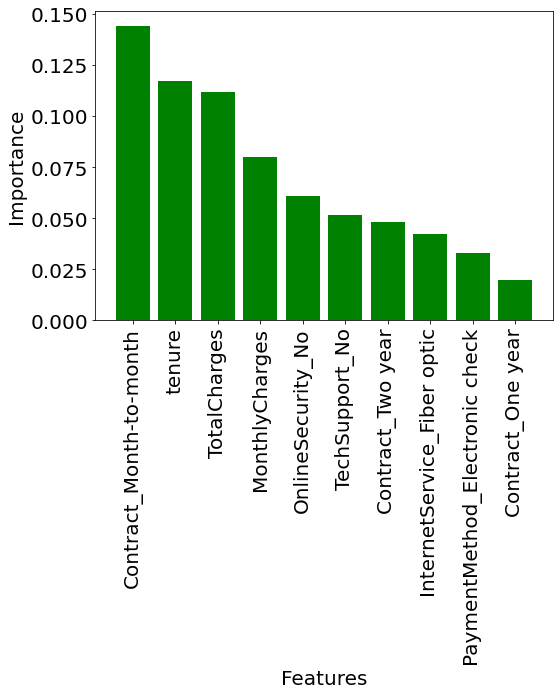

In [ ]:
# Create a figure
fig = plt.figure(figsize=(8, 10))

# The bar plot of the top 5 feature importance
plt.bar(df_fi_rfc['Features'][:10], df_fi_rfc['Importance'][:10], color='green')

# Set x-axis
plt.xlabel('Features')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance')

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/feature_importance_rfc.pdf')
plt.show()

###ROC curve

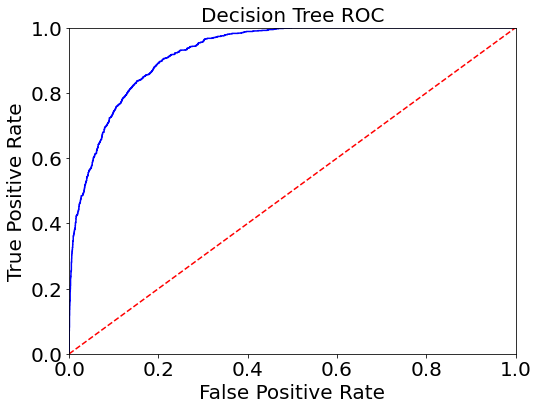

In [ ]:
from sklearn.metrics import roc_curve
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_train, probs[:,1])
plt.title('Decision Tree ROC')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
figure = plt.gcf()
figure.set_size_inches(8,6)
plt.savefig(abspath_curr + '/result/figure/DT_ROC.jpg')
plt.show()

##new tree model


In [ ]:
df_new = df[['Churn','Contract_Month-to-month','tenure','TotalCharges','MonthlyCharges']]
df_train_new = df_train[['Churn','Contract_Month-to-month','tenure','TotalCharges','MonthlyCharges']]
df_test_new = df_test[['Churn','Contract_Month-to-month','tenure','TotalCharges','MonthlyCharges']]
df_val_new = df_val[['Churn','Contract_Month-to-month','tenure','TotalCharges','MonthlyCharges']]

In [ ]:
# Get the feature matrix
X_new = df_new[np.setdiff1d(df_new.columns, [target])].values
X_train_new = df_train_new[np.setdiff1d(df_train_new.columns, [target])].values
X_val_new = df_val_new[np.setdiff1d(df_val_new.columns, [target])].values
X_test_new = df_test_new[np.setdiff1d(df_test_new.columns, [target])].values

# Get the target vector
y_new = df_new[target].values
y_train_new = df_train_new[target].values
y_val_new = df_val_new[target].values
y_test_new = df_test_new[target].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# build model
tree = DecisionTreeClassifier(max_depth=6,random_state=0)
dt_tree=tree.fit(X_train_new,y_train_new)

#10 cross validation
score = cross_val_score(tree, X_new, y_new, cv=10, scoring='accuracy')

print("training set score:{:.3f}".format(tree.score(X_train_new,y_train_new)))
print("test set score:{:.3f}".format(tree.score(X_test_new,y_test_new)))
print("ten cross-validation score:{:.3f}".format(np.mean(score)))
print("Feature importances : \n{}".format(tree.feature_importances_))

training set score:0.809
test set score:0.778
ten cross-validation score:0.781
Feature importances : 
[0.48027441 0.27088016 0.09113633 0.15770909]


In [ ]:
from sklearn.tree import export_graphviz
Te_X = pd.DataFrame(df_new)
export_graphviz(tree,out_file=abspath_curr + '/result/figure/te_tree.dot',class_names=['Churn_yes','Churn_no'],feature_names=np.setdiff1d(df_train_new.columns, [target]),impurity=False,filled=True)

import graphviz
with open(abspath_curr + '/result/figure/te_tree.dot') as f:
    dot_graph=f.read()
graph=graphviz.Source(dot_graph)
graph.format = "png"
graph.render(abspath_curr + '/result/figure/tree')

'/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/fall_2020/finalproject//result/figure/tree.png'

#Summary
- The goal of this project is  detecting churn based on given features
- Tree-based model has good performance and is understandable
- company can use this model to predict who will left
- **Suggestion**:
    - encourage customers sign the long-term contract
    - pay more attention to new customers 
- **Limitations**:
    - the data consider limited features.
    - post features have limited utility
